In [1]:
from keras import layers, models

Using TensorFlow backend.


In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu",))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

In [4]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 15s 258us/step - loss: 0.1719 - accuracy: 0.9463
Epoch 2/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.0488 - accuracy: 0.9849
Epoch 3/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.0336 - accuracy: 0.9898
Epoch 4/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.0254 - accuracy: 0.9923
Epoch 5/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.0198 - accuracy: 0.9944


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 78us/step


In [6]:
test_acc

0.9886999726295471

### Kaggle Example

In [20]:
original_dir = r"data/train/"
dest_dir = r"data/cats_and_dogs_small/"

In [21]:
import os, shutil

In [27]:
def copy(animal, state):
    if state == "train":
        print("train mode activate")
        num = range(1000)
    if state == "validation":
        print("validation mode activate")
        num = range(1000, 1500)
    if state == "test":
        print("test mode activate")
        num = range(1500, 2000)
    fnames = [animal+".{}.jpg".format(i) for i in num]
    
    for fname in fnames:
        shutil.copyfile(os.path.join(original_dir,fname), os.path.join(dest_dir, state, animal, fname))

In [29]:
copy("cat", "validation")
copy("dog", "validation")
copy("dog", "train")
copy("cat", "test")
copy("dog", "test")

validation mode activate
validation mode activate
train mode activate
test mode activate
test mode activate


In [30]:
print(len(os.listdir(os.path.join(dest_dir, "train", "cat"))))

1000


In [36]:
from keras import models, layers, optimizers

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation="relu",))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [37]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=optimizers.RMSprop(lr=1e-4))

#### Image Data preprocessing

In [43]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = r"C:\Users\sychen\Desktop\ipython\Keras notes\data\cats_and_dogs_small\train"
test_dir = r"C:\Users\sychen\Desktop\ipython\Keras notes\data\cats_and_dogs_small\validation"

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary")

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [44]:
for data_batch, labels_batch in train_generator:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [45]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/30
100/100 [==============================] - 12s 123ms/step - loss: 0.6876 - accuracy: 0.5460 - val_loss: 0.6631 - val_accuracy: 0.6090
Epoch 2/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6608 - accuracy: 0.6135 - val_loss: 0.5870 - val_accuracy: 0.6260
Epoch 3/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6244 - accuracy: 0.6520 - val_loss: 0.7766 - val_accuracy: 0.5980
Epoch 4/30
100/100 [==============================] - 5s 52ms/step - loss: 0.5840 - accuracy: 0.6870 - val_loss: 0.4109 - val_accuracy: 0.6650
Epoch 5/30
100/100 [==============================] - 5s 52ms/step - loss: 0.5395 - accuracy: 0.7350 - val_loss: 0.4427 - val_accuracy: 0.6680
Epoch 6/30
100/100 [==============================] - 5s 53ms/step - loss: 0.5036 - accuracy: 0.7495 - val_loss: 0.6466 - val_accuracy: 0.6840
Epoch 7/30
100/100 [==============================] - 5s 52ms/step - loss: 0.4850 - accuracy: 0.7575 - val_loss: 0.7445 - val_accuracy: 0.70

In [46]:
model.save("cats_and_dogs_small_1.h5")

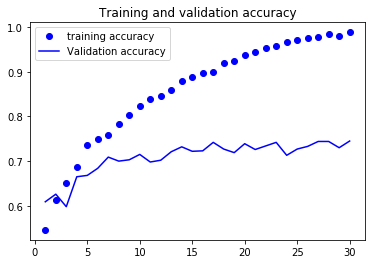

In [48]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

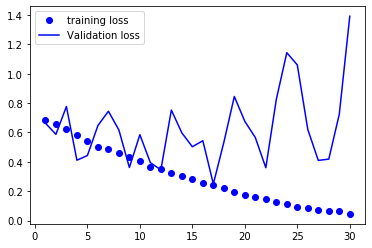

In [50]:
plt.figure()
plt.plot(epochs, loss, "bo", label="training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend()

plt.show()

### Data augmentation

In [53]:
datagen = ImageDataGenerator(
    rotation_range=40, # 旋轉
    width_shift_range=.2, # 平移
    height_shift_range=.2,
    shear_range=.2, # 傾斜
    zoom_range=.2, # 縮放
    horizontal_flip=True, # 水平翻轉
    fill_mode='nearest') # 填空(以最接近的像素值)

In [58]:
from keras.preprocessing import image

fnames = [os.path.join(train_dir, "cat", fname) for fname in os.listdir(os.path.join(train_dir, "cat"))]

In [60]:
img_path = fnames[3]

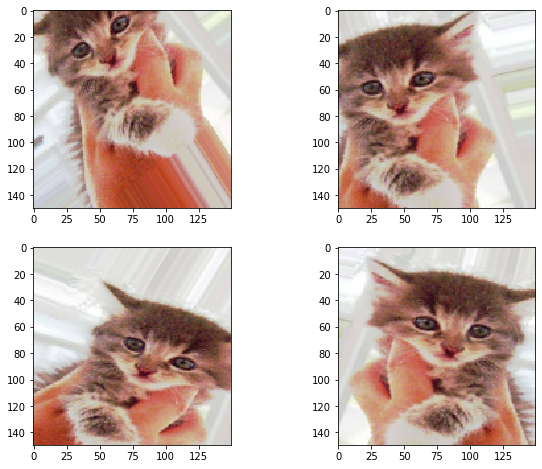

In [92]:
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1, ) + x.shape)
i = 0
plt.figure(figsize=(10, 8))
for batch in datagen.flow(x, batch_size=1):
    
    plt.subplot(2, 2, i+1)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

### Add Dropout

In [93]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation="relu",))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [94]:
model.compile(loss="binary_crossentropy", metrics=["accuracy"], optimizer=optimizers.RMSprop(lr=1e-4))

#### Augument

In [95]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=.2,
    height_shift_range=.2,
    shear_range=.2,
    zoom_range=.2,
    horizontal_flip=True, )

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary")

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="binary")

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data = validation_generator,
    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 18s 177ms/step - loss: 0.6925 - accuracy: 0.5220 - val_loss: 0.6584 - val_accuracy: 0.5044
Epoch 2/100
100/100 [==============================] - 16s 162ms/step - loss: 0.6825 - accuracy: 0.5515 - val_loss: 0.7571 - val_accuracy: 0.5290
Epoch 3/100
100/100 [==============================] - 16s 159ms/step - loss: 0.6750 - accuracy: 0.5758 - val_loss: 0.6172 - val_accuracy: 0.5736
Epoch 4/100
100/100 [==============================] - 17s 166ms/step - loss: 0.6636 - accuracy: 0.6024 - val_loss: 0.6385 - val_accuracy: 0.6488
Epoch 5/100
100/100 [==============================] - 16s 158ms/step - loss: 0.6362 - accuracy: 0.6297 - val_loss: 0.5545 - val_accuracy: 0.6777
Epoch 6/100
100/100 [==============================] - 18s 175ms/step - loss: 0.6302 - accuracy: 0.6460 - val_loss: 0.6117 - val_accuracy: 0.6823
Epoch 7/100
100/100 [===================

In [96]:
model.save("cats_and_dogs_small_2.h5")

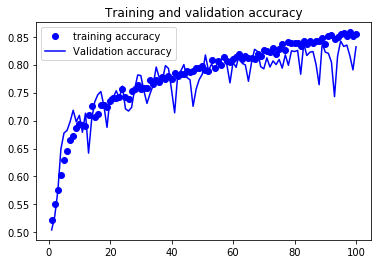

In [97]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

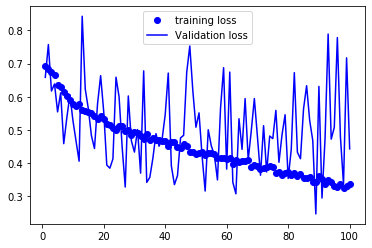

In [98]:
plt.figure()
plt.plot(epochs, loss, "bo", label="training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend()

plt.show()

### VGG16

In [5]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
# 初始化MODEL的權重檢查點
# 把頂部分類器去除
# input張量

In [6]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

#### 沒有資料擴增的快速特徵萃取

In [11]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = r"C:\Users\sychen\Desktop\ipython\Keras notes\data\cats_and_dogs_small"

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150, 150), batch_size=batch_size, class_mode="binary")
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size:(i+1) * batch_size] = features_batch
        labels[i*batch_size:(i+1)*batch_size] = labels_batch
        i += 1
        print(i, end=" ")
        if i * batch_size >= sample_count:
                break
    return features, labels

In [12]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

In [13]:
# flatten
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [18]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', metrics=["accuracy"], optimizer=optimizers.RMSprop(lr=2e-5))
history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5776 - accuracy: 0.6885 - val_loss: 0.4360 - val_accuracy: 0.8370
Epoch 2/30
2000/2000 [==============================] - 1s 386us/step - loss: 0.4136 - accuracy: 0.8255 - val_loss: 0.3562 - val_accuracy: 0.8640
Epoch 3/30
2000/2000 [==============================] - 1s 391us/step - loss: 0.3479 - accuracy: 0.8555 - val_loss: 0.3256 - val_accuracy: 0.8670
Epoch 4/30
2000/2000 [==============================] - 1s 391us/step - loss: 0.3104 - accuracy: 0.8730 - val_loss: 0.2961 - val_accuracy: 0.8870
Epoch 5/30
2000/2000 [==============================] - 1s 410us/step - loss: 0.2830 - accuracy: 0.8880 - val_loss: 0.2816 - val_accuracy: 0.8950
Epoch 6/30
2000/2000 [==============================] - 1s 391us/step - loss: 0.2639 - accuracy: 0.8920 - val_loss: 0.2719 - val_accuracy: 0.8850
Epoch 7/30
2000/2000 [==============================] - 1s 401us/step - loss: 

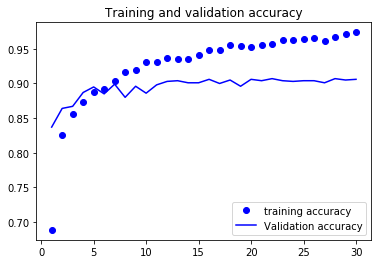

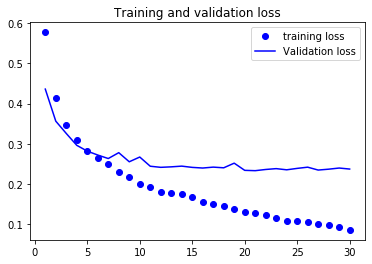

In [24]:
import matplotlib.pyplot as plt

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "bo", label="training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label="training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

#### 另一個方法請見外面

### Loading

In [1]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Using TensorFlow backend.


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [6]:
# 取一張不是訓練過的貓咪圖
img_path = r"C:/Users/sychen/Desktop/ipython/Keras notes/data/cats_and_dogs_small/test/cat/cat.1700.jpg"

from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255
print(img_tensor.shape)

(1, 150, 150, 3)


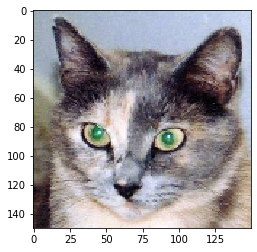

In [8]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

In [26]:
from keras import models
# 一個輸入8個輸出
layer_outputs = [layer.output for layer in model.layers[:8]] # 取model前8層的輸出張量
for op in layer_outputs:
    print(op)
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

Tensor("conv2d_5/Relu:0", shape=(None, 148, 148, 32), dtype=float32)
Tensor("max_pooling2d_5/MaxPool:0", shape=(None, 74, 74, 32), dtype=float32)
Tensor("conv2d_6/Relu:0", shape=(None, 72, 72, 64), dtype=float32)
Tensor("max_pooling2d_6/MaxPool:0", shape=(None, 36, 36, 64), dtype=float32)
Tensor("conv2d_7/Relu:0", shape=(None, 34, 34, 128), dtype=float32)
Tensor("max_pooling2d_7/MaxPool:0", shape=(None, 17, 17, 128), dtype=float32)
Tensor("conv2d_8/Relu:0", shape=(None, 15, 15, 128), dtype=float32)
Tensor("max_pooling2d_8/MaxPool:0", shape=(None, 7, 7, 128), dtype=float32)


In [27]:
activations = activation_model.predict(img_tensor)
print(len(activations))

8


In [28]:
# 第一層出來的結果
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 148, 148, 32)

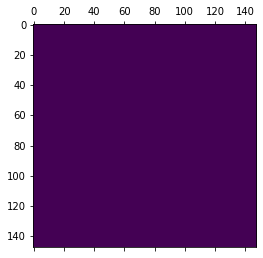

In [29]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

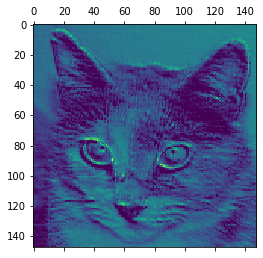

In [30]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

C:\Users\sychen\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide


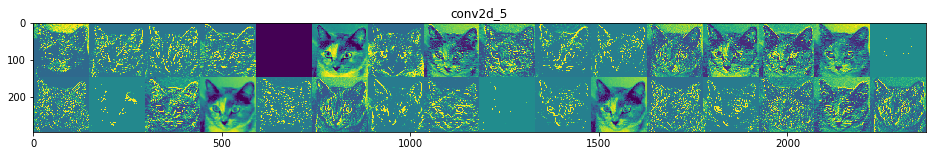

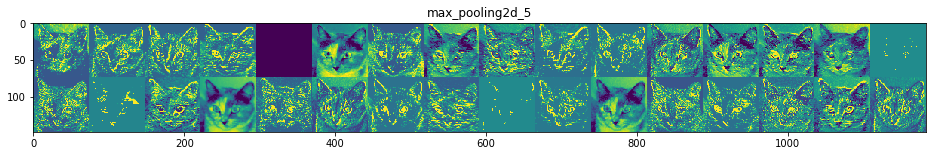

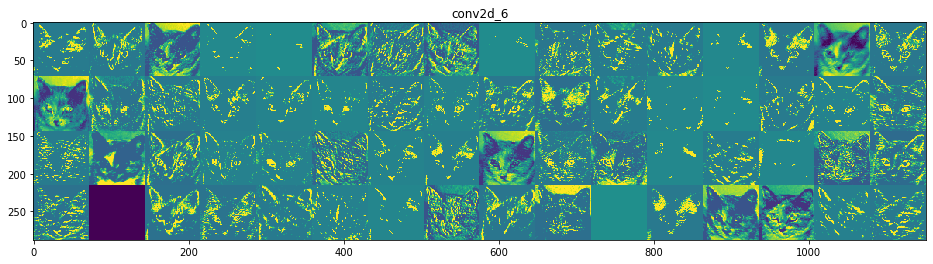

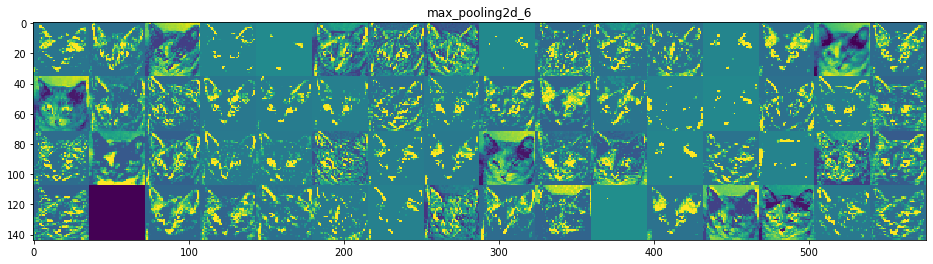

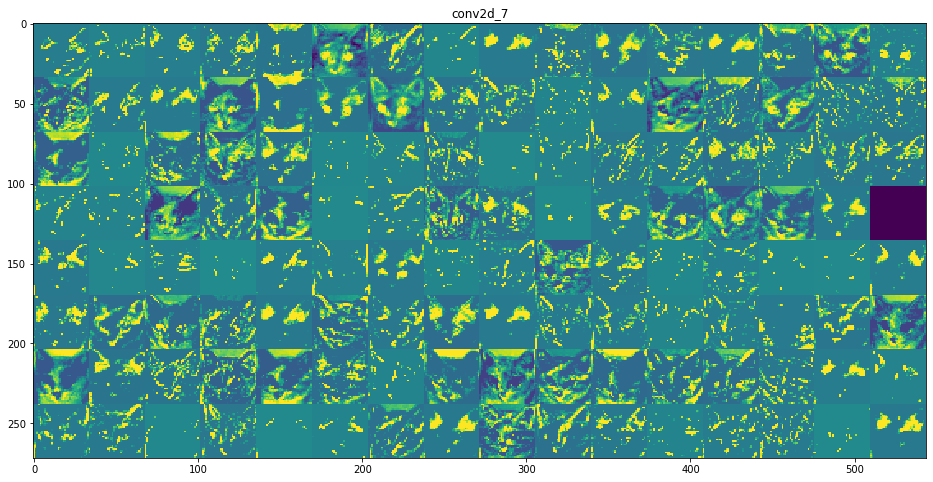

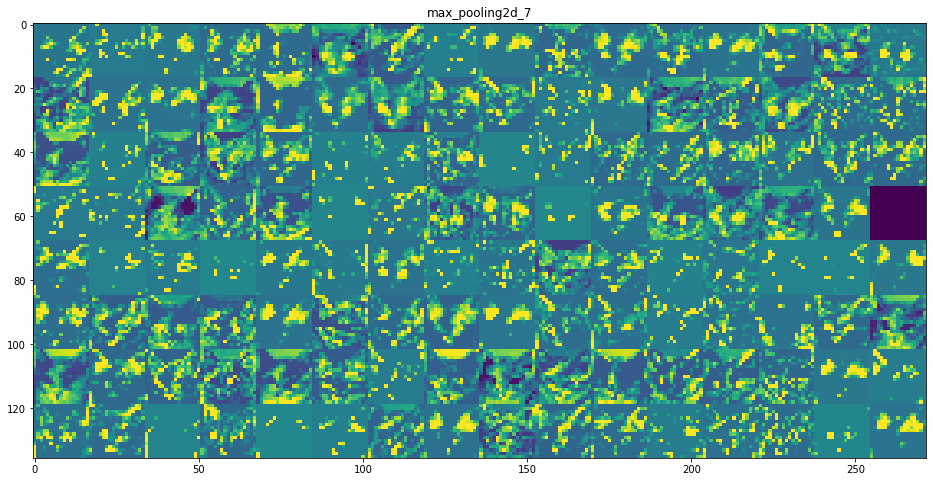

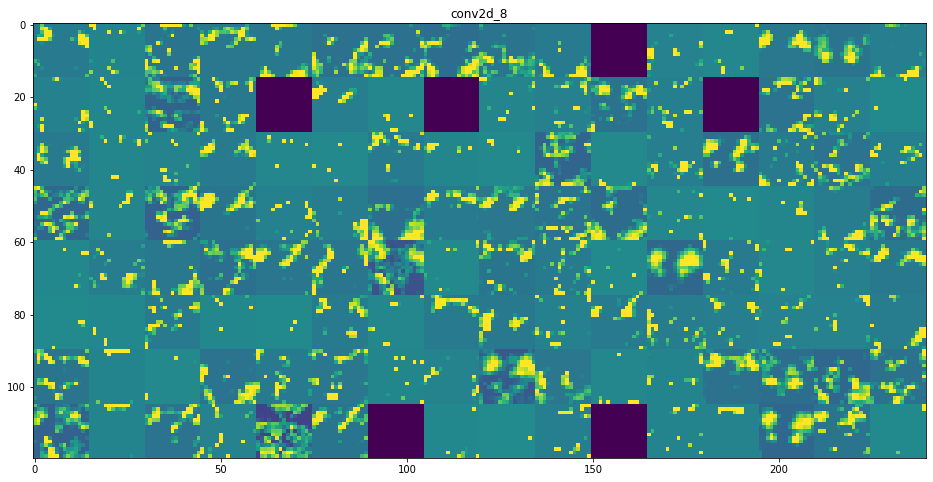

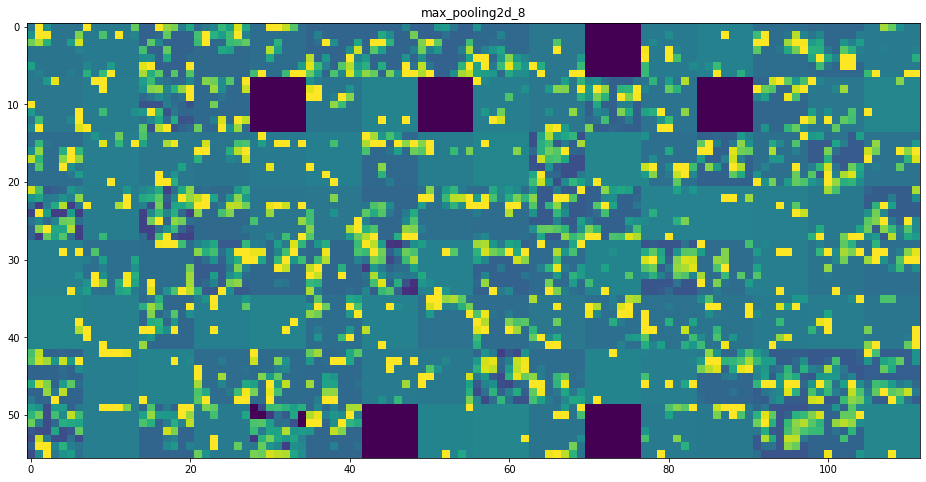

In [34]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size*n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col*size : (col+1)*size, row*size : (row+1)*size ] = channel_image
    
    scale = 1./size
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### convnet filter

In [39]:
from keras.applications import VGG16
from keras import backend as K

model = VGG16(weights='imagenet', include_top=False)
layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

#### 取得loss相對於輸入的梯度

In [41]:
grads = K.gradients(loss, model.input)[0]

#### 梯度正規化

In [43]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

#### 取得輸出張量的keras function

In [45]:
iterate = K.function([model.input], [loss, grads])
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

#### 透過sgd實作loss maximum

In [47]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 +128. # 從帶有雜訊的灰階圖像開始

step = 1. # 每個梯度更新大小
for i in range(40):
    loss_value, grads_value = iterate([input_img_data]) # 計算損失值和梯度值
    input_img_data += grads_value * step # 最大化損失調整

In [48]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    x += 0.5
    # clip這個函數將將數組中的元素限制在a_min, a_max之間
    x = np.clip(x, 0, 1)
    
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

#### 建立filter視覺化函數

In [66]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 +128. # 從帶有雜訊的灰階圖像開始
    
    step = 1. # 每個梯度更新大小
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data]) # 計算損失值和梯度值
        input_img_data += grads_value * step # 最大化損失調整
    
    img = input_img_data[0]
    return deprocess_image(img)

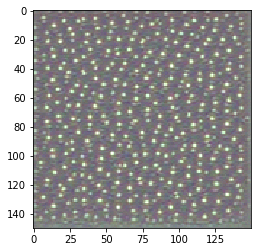

In [52]:
plt.imshow(generate_pattern('block3_conv1', 0))

In [ ]:
for layer_name in ["block1_conv1", "block2_conv1", "block3_conv1", "block4_conv1"]:
    size = 64
    margin = 5
    
    results = np.zeros((8*size + 7*margin, 8*size + 7*margin ,3))
    for i in range(8):
        for j in range(8):
            
            filter_img = generate_pattern(layer_name, i + (j*8), size=64)

            horizontal_start = i*size + i*margin
            horizontal_end = horizontal_start + size
            vertical_start = j*size + j*margin
            vertical_end = vertical_start + size
            
            results[horizontal_start:horizontal_end, vertical_start:vertical_end, :] = filter_img
            
    plt.figure(figsize=(10, 10))
    plt.imshow(results)
    plt.show()

### heatmap of class activation

In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet') # 包含頂層

Using TensorFlow backend.


553467904/553467096 [==============================] - 21s 0us/step


<class 'PIL.Image.Image'>
(224, 224)
(224, 224, 3)


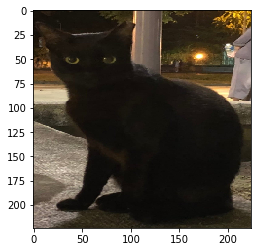

In [34]:
from keras import backend as K
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

img_path = 'data/lilblack.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
print(type(img))
print(img.size)

x = image.img_to_array(img)
print(x.shape)

x = np.expand_dims(x, axis=0)

x = preprocess_input(x)

In [35]:
preds = model.predict(x)

In [36]:
print("小黑的預測結果:", decode_predictions(preds, top=3)[0])

小黑的預測結果: [('n02104365', 'schipperke', 0.46636003), ('n02124075', 'Egyptian_cat', 0.16568427), ('n02105412', 'kelpie', 0.079524614)]


### Grad-CAM

In [37]:
lilblack_output = model.output[:, 285]
last_conv_layer = model.get_layer('block5_conv3')
grads = K.gradients(lilblack_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis=-1)

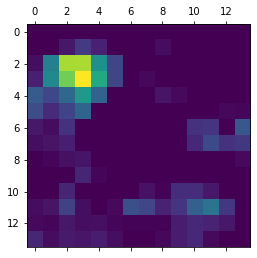

In [38]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [39]:
import cv2

img = cv2.imread(img_path)

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = heatmap * 0.4 + img

cv2.imwrite('data/lilblack_cam.jpg', superimposed_img)

True